# SymbiPredict Dataset


### Attempt with a keras model
Maybe i can deploy it to my firebase project

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt


df = pd.read_csv("/content/symbipredict_2022_corrected.csv")
X = np.array(df.iloc[:, :-1])
y = np.array(df['prognosis'])

In [ ]:

for col in df.columns:
  print(f"\"{col}\",")

"itching",
"skin_rash",
"nodal_skin_eruptions",
"continuous_sneezing",
"shivering",
"chills",
"joint_pain",
"stomach_pain",
"acidity",
"ulcers_on_tongue",
"muscle_wasting",
"vomiting",
"burning_micturition",
"spotting_urination",
"fatigue",
"weight_gain",
"anxiety",
"cold_hands_and_feets",
"mood_swings",
"weight_loss",
"restlessness",
"lethargy",
"patches_in_throat",
"irregular_sugar_level",
"cough",
"high_fever",
"sunken_eyes",
"breathlessness",
"sweating",
"dehydration",
"indigestion",
"headache",
"yellowish_skin",
"dark_urine",
"nausea",
"loss_of_appetite",
"pain_behind_the_eyes",
"back_pain",
"constipation",
"abdominal_pain",
"diarrhoea",
"mild_fever",
"yellow_urine",
"yellowing_of_eyes",
"acute_liver_failure",
"fluid_overload",
"swelling_of_stomach",
"swelled_lymph_nodes",
"malaise",
"blurred_and_distorted_vision",
"phlegm",
"throat_irritation",
"redness_of_eyes",
"sinus_pressure",
"runny_nose",
"congestion",
"chest_pain",
"weakness_in_limbs",
"fast_heart_rate",
"pain_during_bowel

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

### But first, let's encode the targets (diseases)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [ ]:
# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train_encoded, num_classes=None)
Y_test = to_categorical(y_test_encoded, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(3968, 41)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.

In [ ]:
print(X_train[0])

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Create model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(41, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()



The first line is the number of unique diseases

In [ ]:
print(np.unique(y).shape)
print(y.shape)

(41,)
(4961,)


### Train model

In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100, batch_size=32)

Epoch 1/100
124/124 [==============================] - 1s 4ms/step - loss: 3.3860 - accuracy: 0.3498 - val_loss: 2.7983 - val_accuracy: 0.9547
Epoch 2/100
124/124 [==============================] - 0s 2ms/step - loss: 2.3713 - accuracy: 0.7240 - val_loss: 1.7076 - val_accuracy: 0.9930
Epoch 3/100
124/124 [==============================] - 0s 3ms/step - loss: 1.6962 - accuracy: 0.8299 - val_loss: 1.1318 - val_accuracy: 1.0000
Epoch 4/100
124/124 [==============================] - 0s 2ms/step - loss: 1.4168 - accuracy: 0.8584 - val_loss: 0.8765 - val_accuracy: 1.0000
Epoch 5/100
124/124 [==============================] - 0s 3ms/step - loss: 1.2350 - accuracy: 0.8765 - val_loss: 0.7422 - val_accuracy: 1.0000
Epoch 6/100
124/124 [==============================] - 0s 2ms/step - loss: 1.1277 - accuracy: 0.8916 - val_loss: 0.6620 - val_accuracy: 1.0000
Epoch 7/100
124/124 [==============================] - 0s 2ms/step - loss: 1.0448 - accuracy: 0.9047 - val_loss: 0.5977 - val_accuracy: 1.0000

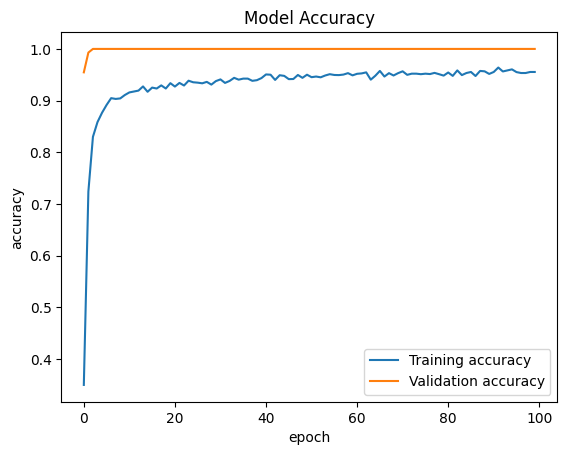

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

In [ ]:
some_symptoms = "0	0	0	0 0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0"
some_list = some_symptoms.split()
int_list = list(map(int,some_list))
predict_array = np.array(int_list)
predict_array = np.expand_dims(predict_array, axis=0)
prediction = model.predict(predict_array)
print(prediction.shape)
predicted_class = np.argmax(prediction, axis=1)  # Get the class with the highest probability
print(f"Predicted class: {predicted_class[0]}")
print(f"Probabilities: {prediction[0][12]}")

1/1 [==============================] - 0s 61ms/step
(1, 41)
Predicted class: 12
Probabilities: 0.7355088591575623


In [ ]:
some_symptoms = "1	0	0	0	0	0	0	0	0	0	0	1	0	0	1	0	0	0	0	1	0	0	0	0	0	1	0	0	0	0	0	0	1	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0"
some_list = some_symptoms.split()
int_list = list(map(int,some_list))
print(len(int_list))

132


In [ ]:
print(np.unique(y)[12])

Dimorphic Hemmorhoids (piles)


In [ ]:
model.save("model.keras")

## Get all unique diseases and save them

In [ ]:
print(np.unique(y))

['AIDS' 'Acne' 'Alcoholic Hepatitis' 'Allergy' 'Arthritis'
 'Bronchial Asthma' 'Cervical Spondylosis' 'Chickenpox'
 'Chronic Cholestasis' 'Common Cold' 'Dengue' 'Diabetes '
 'Dimorphic Hemmorhoids (piles)' 'Drug Reaction' 'Fungal Infection' 'GERD'
 'Gastroenteritis' 'Heart Attack' 'Hepatitis A' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthritis' 'Paralysis (brain hemorrhage)'
 'Peptic Ulcer Disease' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary Tract Infection' 'Varicose Veins' 'Vertigo']


In [ ]:
with open("output.txt", 'w') as f:
  f.write('\n'.join(np.unique(y)))

print("Successfully saved strings to output.txt!")

Successfully saved strings to output.txt!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Convert model to tflite file

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model


In [ ]:
model_path = '/content/model.keras'  # Replace with your actual path


In [ ]:
try:
  model = load_model(model_path)
  print("Model loaded successfully!")
except OSError as e:
  print(f"Error loading model: {e}")


Model loaded successfully!


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)


In [ ]:
tflite_model_file = 'converted_model.tflite'


In [ ]:
try:
  tflite_model = converter.convert()
  with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)
  print("TFLite model saved successfully!")
except OSError as e:
  print(f"Error saving TFLite model: {e}")


TFLite model saved successfully!
